In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
xTr = pd.read_csv('train_x.csv')
xTr.set_index('date',inplace=True, drop = True)


yRegression = pd.read_csv('train_y_regression.csv')
yClassification = pd.read_csv('train_y_classification.csv')

<AxesSubplot:>

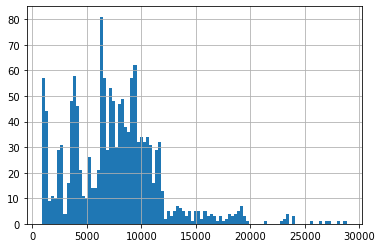

In [3]:
yRegression['next_day_close'].hist(bins=100)

"\ni = 0\nfor triaxis in axes:\n    for axis in triaxis:\n        sns.displot(xTr.columns[i], bins = 100, kde=True,ax=axis)\n        #xTr.hist(column = xTr.columns[i], bins = 100, ax=axis)\n        axis.set_xlabel(xTr.columns[i])\n        axis.set_ylabel('frequency')\n        i = i+1\n"

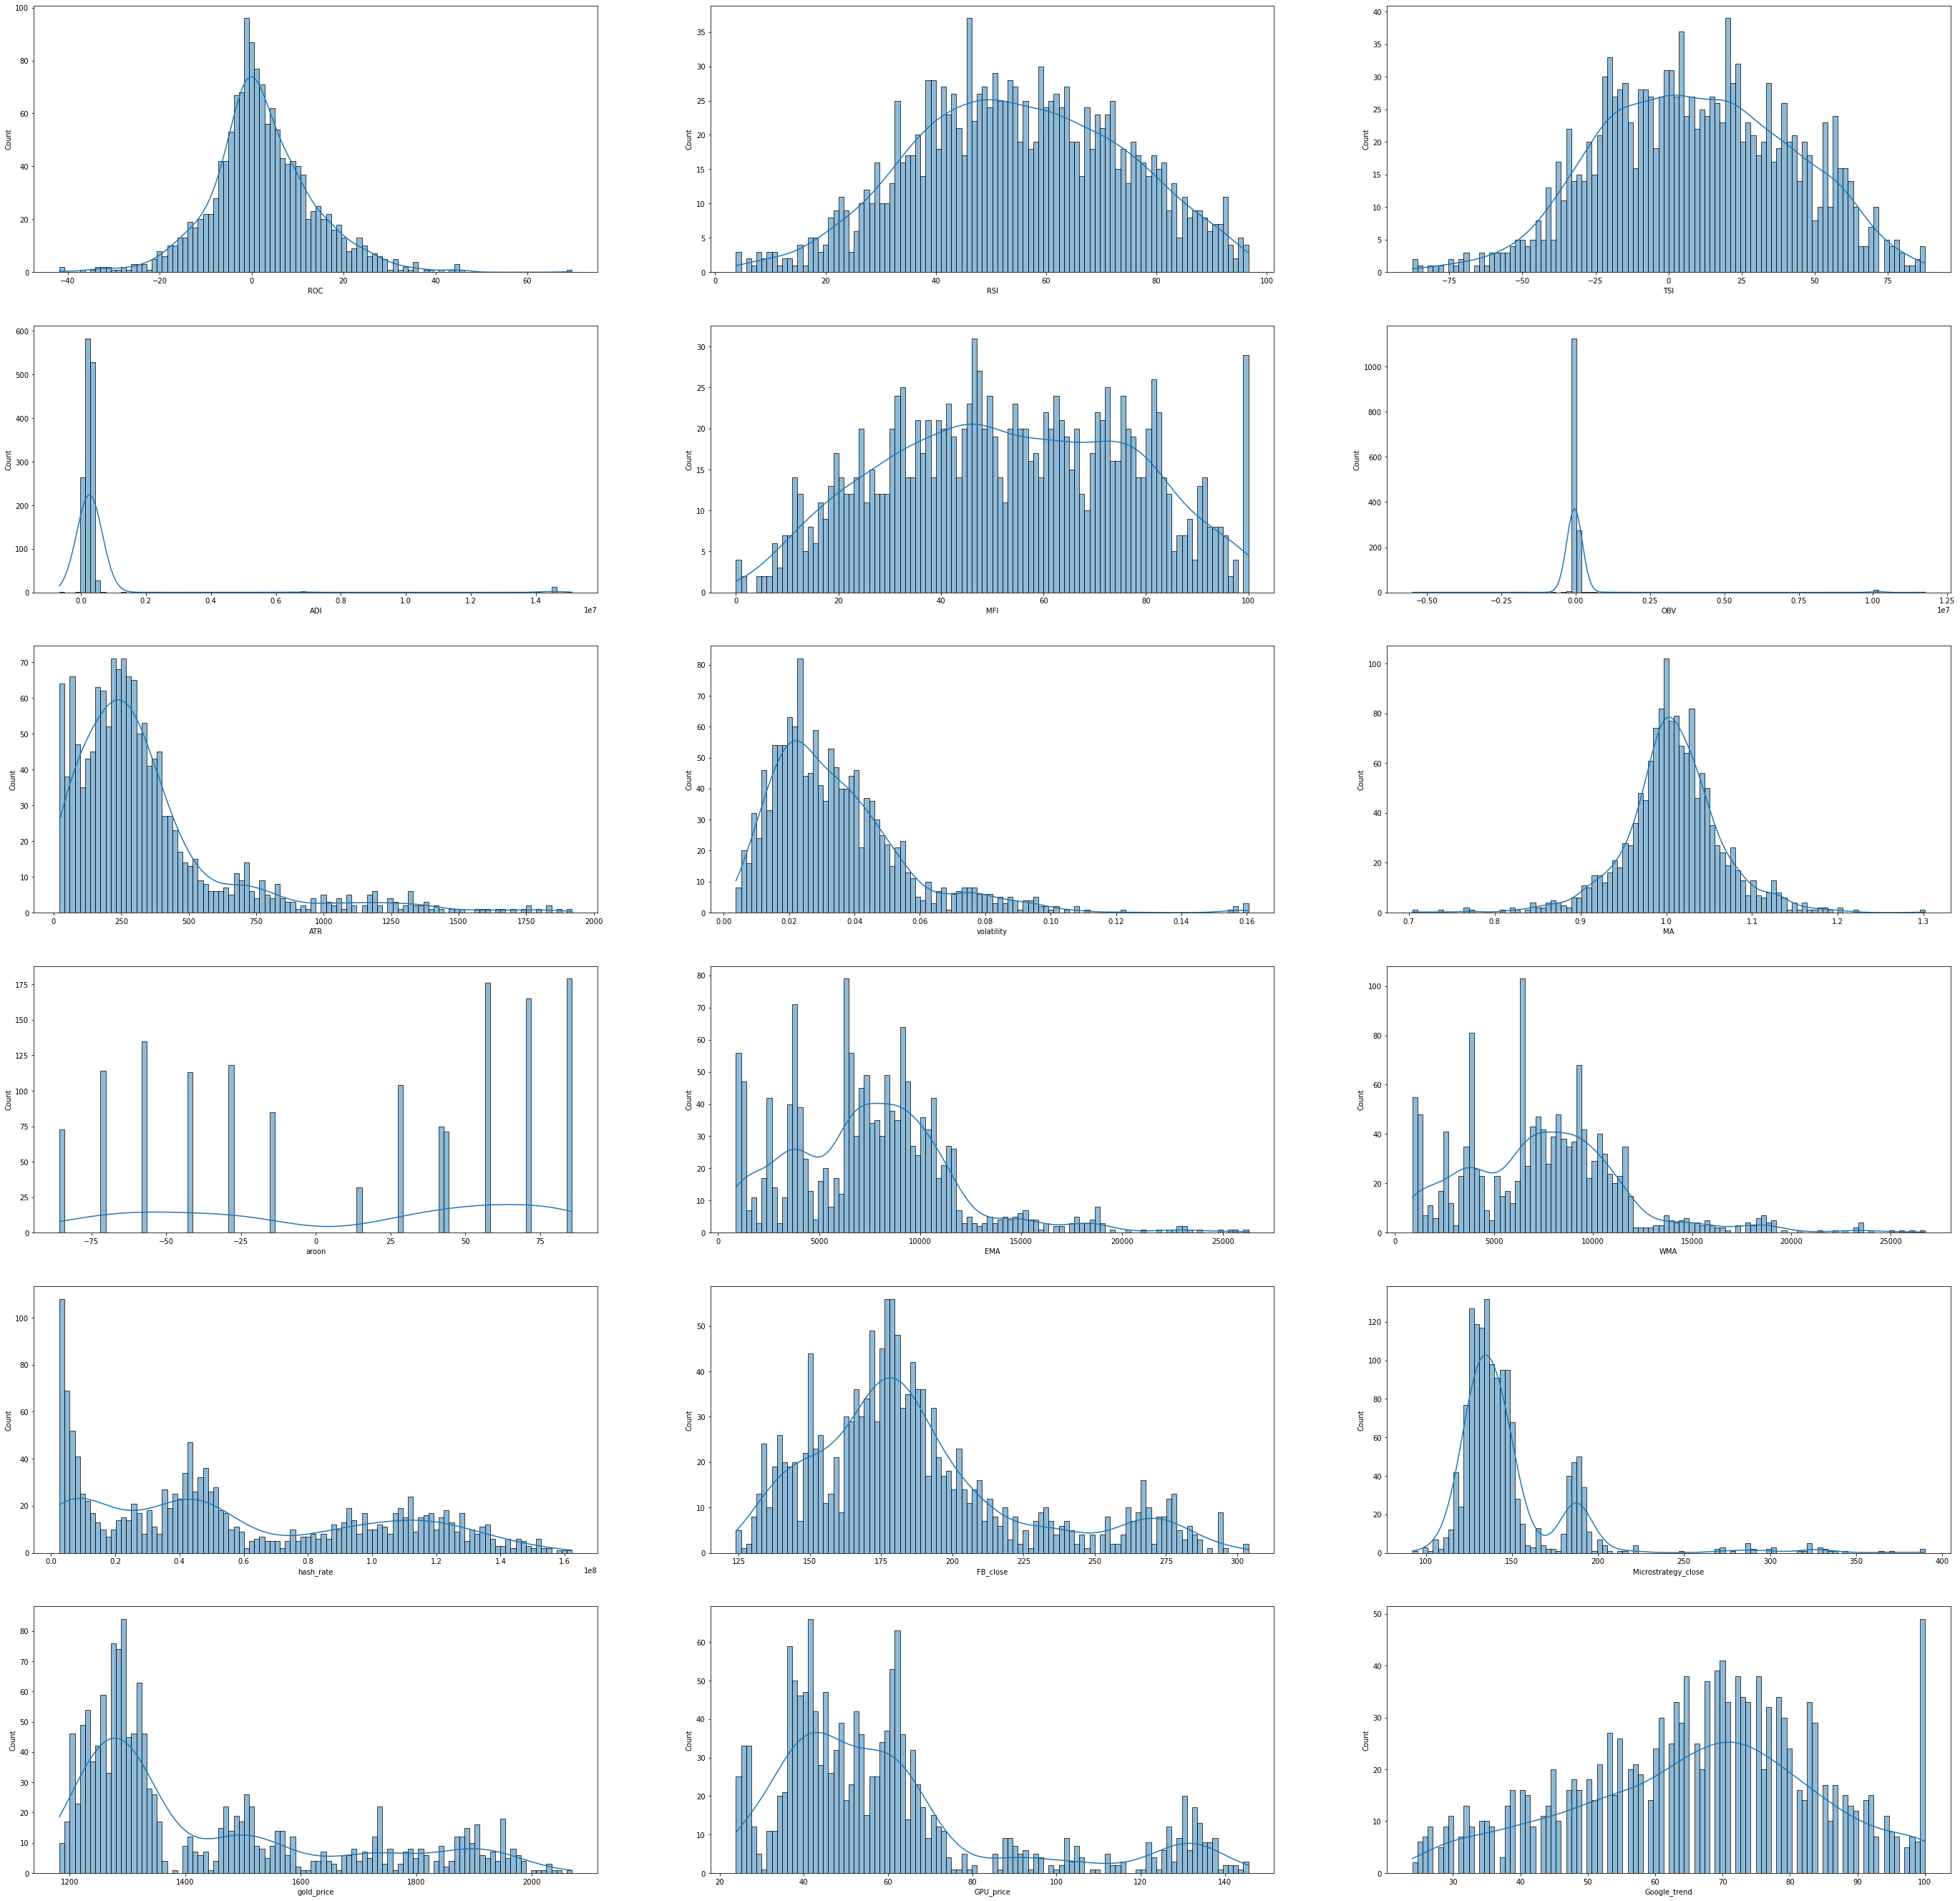

In [4]:
fig, axes = plt.subplots(len(xTr.columns)//3, 3, figsize=(48, 48))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['xtick.labelsize'] = 15
axes = axes.flatten()


for i,col in enumerate(xTr.columns[0:]):
     sns.histplot(x=xTr[col], kde=True, bins=100, ax=axes[i])
'''
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.displot(xTr.columns[i], bins = 100, kde=True,ax=axis)
        #xTr.hist(column = xTr.columns[i], bins = 100, ax=axis)
        axis.set_xlabel(xTr.columns[i])
        axis.set_ylabel('frequency')
        i = i+1
'''

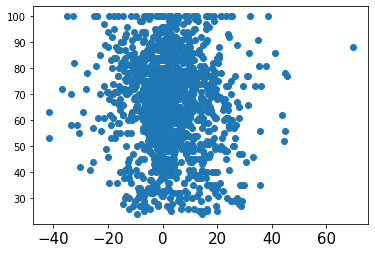

In [5]:
plt.scatter(xTr['ROC'],xTr['Google_trend'])

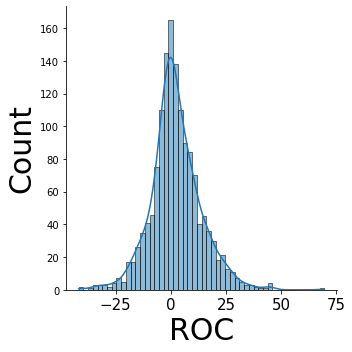

In [6]:

sns.displot(xTr.ROC, kde=True) #plot of ROC

<AxesSubplot:xlabel='Google_trend', ylabel='next_day_close'>

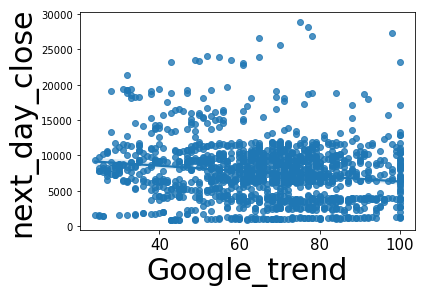

In [7]:
sns.regplot(x=xTr.Google_trend, y=yRegression.next_day_close)

<AxesSubplot:xlabel='volatility', ylabel='next_day_close'>

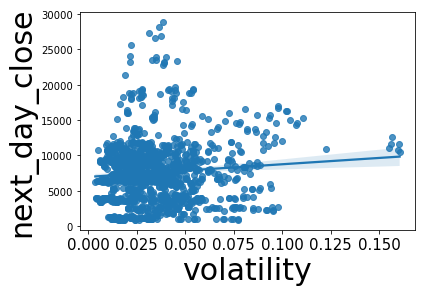

In [8]:
sns.regplot(x=xTr.volatility, y=yRegression.next_day_close)

<AxesSubplot:xlabel='FB_close', ylabel='next_day_close'>

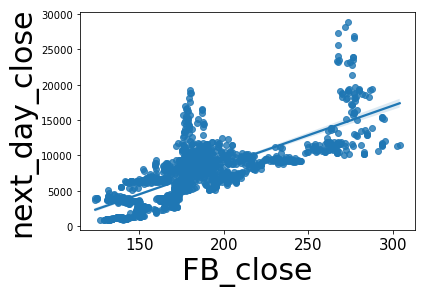

In [9]:
sns.regplot(x=xTr.FB_close, y=yRegression.next_day_close)

<AxesSubplot:xlabel='Microstrategy_close', ylabel='next_day_close'>

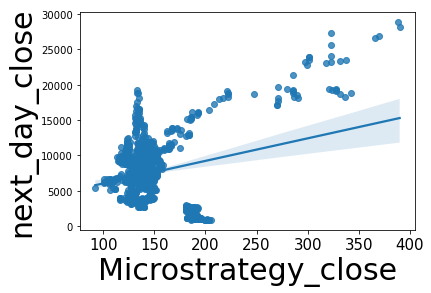

In [10]:
sns.regplot(x=xTr.Microstrategy_close, y=yRegression.next_day_close)

<AxesSubplot:xlabel='Microstrategy_close', ylabel='next_day_close'>

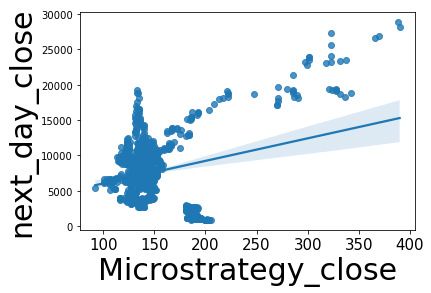

In [11]:
sns.regplot(x=xTr.Microstrategy_close, y=yRegression.next_day_close)

<AxesSubplot:xlabel='hash_rate', ylabel='next_day_close'>

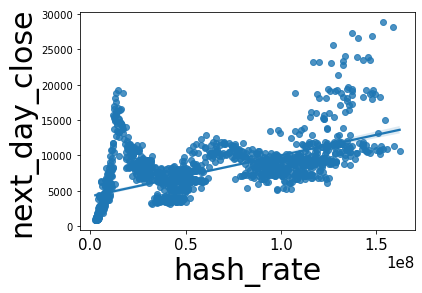

In [12]:
sns.regplot(x=xTr.hash_rate, y=yRegression.next_day_close) #this is interesting. the relationship is nonlinear, but there seems to be some predictable relationship

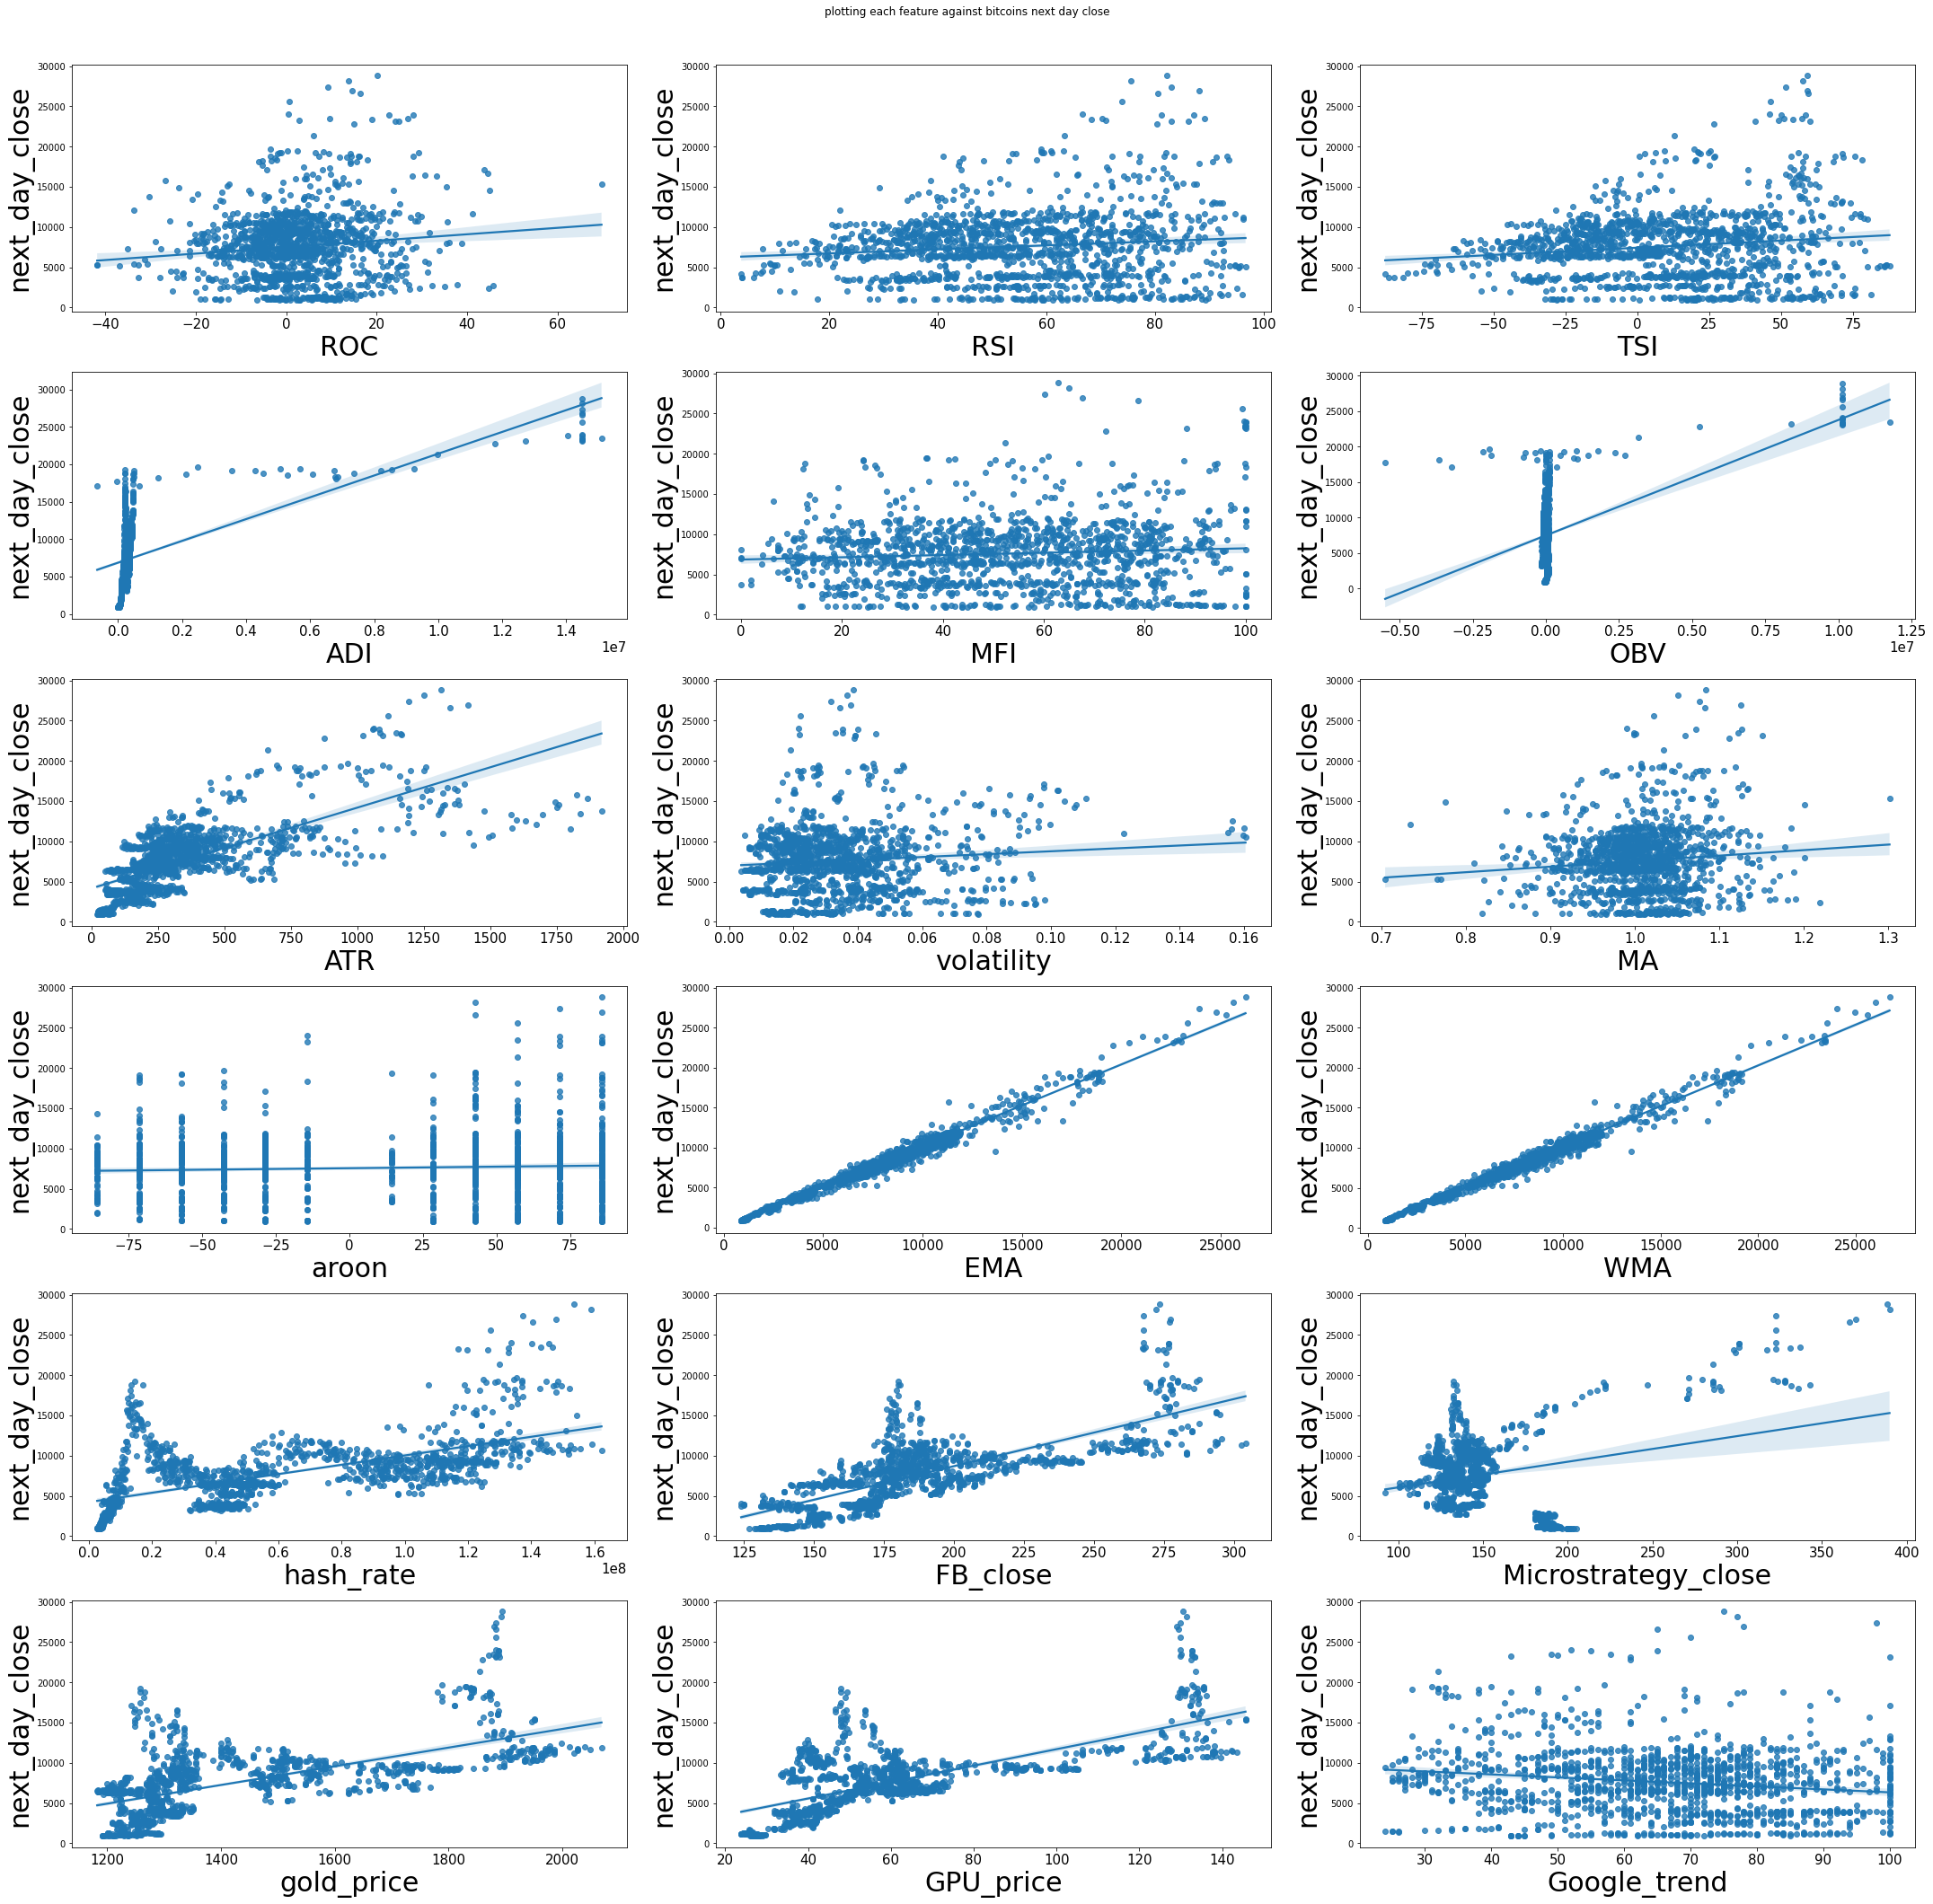

In [13]:

fig, ax= plt.subplots(len(xTr.columns)//3, 3, figsize=(30,30))
ax = ax.flatten()

plt.rcParams["axes.labelsize"] = 30
plt.rcParams['xtick.labelsize'] = 15

for i,col in enumerate(xTr.columns[0:]):
     sns.regplot(x=xTr[col], y=yRegression['next_day_close'], ax=ax[i])

fig.suptitle('plotting each feature against bitcoins next day close')
fig.tight_layout()
fig.subplots_adjust(top=0.95)      # TO ACCOMMODATE TITLE


plt.show()

In [14]:
#scaling the features to run ridge regression (data preprocessing)
scaler = sklearn.preprocessing.StandardScaler()
xTr_scaled = scaler.fit_transform(xTr)

In [15]:
xTr_scaled_df = pd.DataFrame(xTr_scaled,columns = xTr.columns)

In [16]:
#baseline ridge regression with alpha=1
y = yRegression['next_day_close']

ridge = sklearn.linear_model.Ridge(alpha=1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ridge, xTr_scaled_df, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Mean MAE: 258.480 (26.137)


In [17]:
#lets use gridsearch to tune alpha (used some code from machinelearningmastery.com)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(xTr_scaled_df, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -257.459
Config: {'alpha': 0.03}


In [18]:
#as you can see from the output, optimizing for alpha doesnt improve the error very much. perhaps ridge regression is not the best option, or
#our feature selection is not where it needs to be quite yet.
ridge = sklearn.linear_model.Ridge(alpha=.03)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(ridge, xTr_scaled_df, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 257.459 (25.363)


In [46]:
x_minute = pd.read_csv('xTr_minute_classiification.csv')
x_minute = x_minute.set_index(x_minute['date'])
x_minute = x_minute.drop(['date'],axis=1)
x_minute = x_minute[~x_minute.index.duplicated()]
#x_minute =x_minute.loc[x_minute['change_in_volume']<x_minute['change_in_volume'].nlargest(100)]

ValueError: Can only compare identically-labeled Series objects

In [41]:

x_minute.head()


,change_in_volume,PVO,ADI,MFI,OBV,RSI,TSI,crossed_SMA200_breakdown,crossed_SMA200_breakout
date,,,,,,,,,
2017-07-20 00:00:00,1.694373,0.181176,88201.924832,64.163608,100673.053895,53.148599,7.235874,0,0
2017-07-20 00:01:00,-1.325690,-3.138730,88201.924832,63.406532,100673.422579,53.148599,7.974957,0,0
2017-07-20 00:02:00,0.899670,-6.786668,88203.193185,64.848825,100674.690932,53.215311,8.634439,0,0
2017-07-20 00:03:00,-0.668278,-10.824877,88203.193185,64.806681,100675.291008,56.514148,10.814191,0,0
2017-07-20 00:04:00,4.031428,-13.418827,88207.824689,65.889557,100679.922511,59.523902,14.216984,0,0


<AxesSubplot:xlabel='change_in_volume', ylabel='Count'>

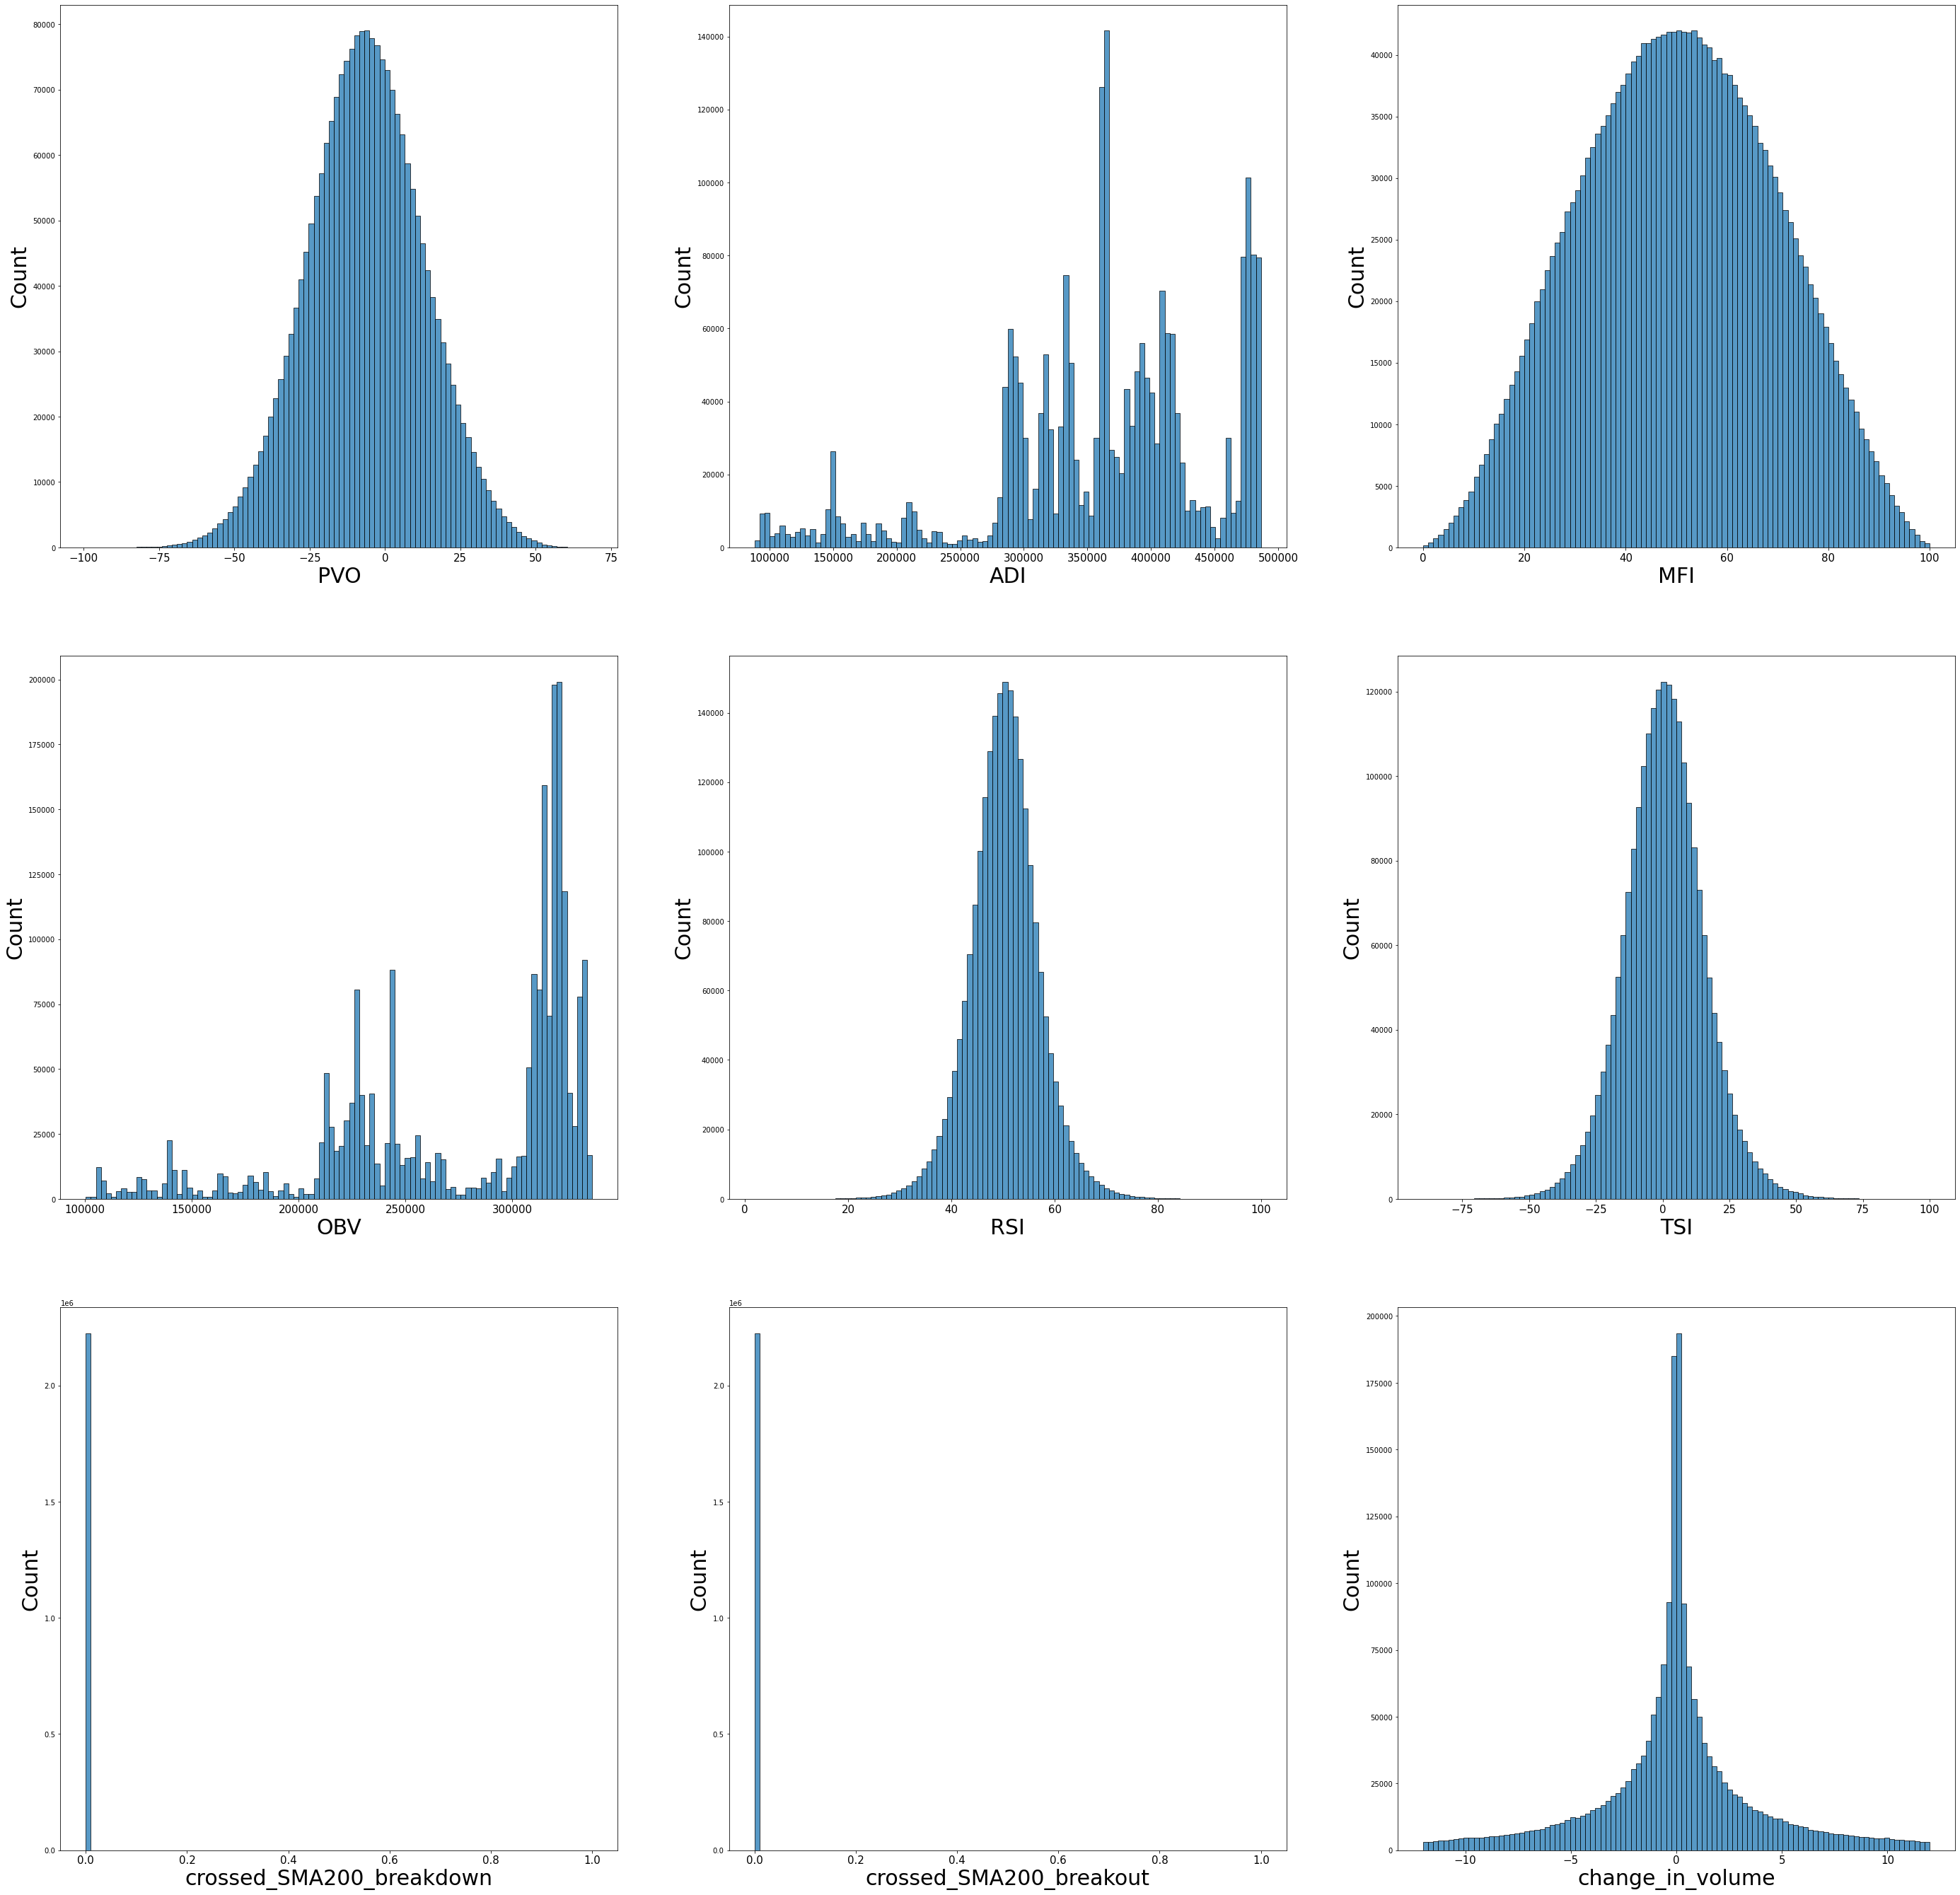

In [54]:
fig, axes = plt.subplots(len(x_minute.columns)//3, 3, figsize=(48, 48))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['xtick.labelsize'] = 15
axes = axes.flatten()


for i,col in enumerate(x_minute.columns[1:]):
     sns.histplot(x=x_minute[col], bins=100, ax=axes[i])

sns.histplot(x=x_minute['change_in_volume'], bins=100, ax=axes[8],binrange=[-12,12])

In [60]:
x_minute.loc[(x_minute['crossed_SMA200_breakout']==1) | (x_minute['crossed_SMA200_breakdown'] ==1)].shape[0]

1085

<AxesSubplot:>

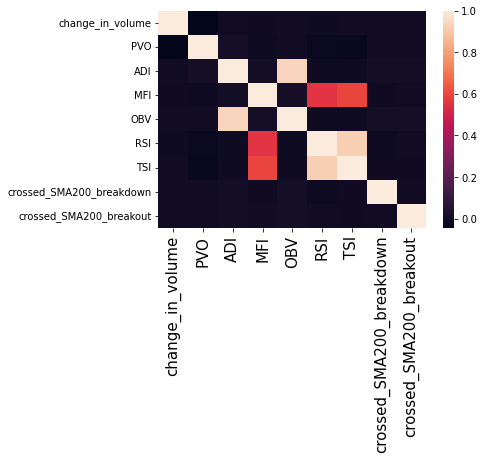

In [84]:
sns.heatmap(x_minute.corr())



In [3]:
xhour = pd.read_csv('train_x_hourly.csv')
xhour = xhour.set_index('date')

yhour = pd.read_csv('train_y_classification_hourly.csv')
yhour = yhour.set_index('date')

In [80]:
xhour.head()

,RSI,TSI,ADI,MFI,OBV,ATR,volatility,MA,aroon,EMA,WMA,bitcoin
date,,,,,,,,,,,,
2017-01-04 01:00:00,62.395943,19.229803,6884.217137,58.056292,7686.515610,6.546617,0.004538,1.011210,66.666667,1020.812913,1021.959267,56
2017-01-04 02:00:00,63.462418,19.850272,7145.003741,54.893007,8045.949864,6.559258,0.004424,1.012912,66.666667,1021.905480,1023.045967,57
2017-01-04 03:00:00,65.001500,20.663031,7211.051482,68.082223,8665.147429,6.598456,0.003841,1.015069,79.166667,1023.165041,1024.355300,58
2017-01-04 04:00:00,66.782941,21.699715,7428.606887,68.394296,8929.286451,6.545604,0.003515,1.018117,83.333333,1024.634238,1025.898067,57
2017-01-04 05:00:00,67.280115,22.705477,7467.053227,69.203216,9245.538604,6.591620,0.003512,1.018411,87.500000,1026.074699,1027.469533,58


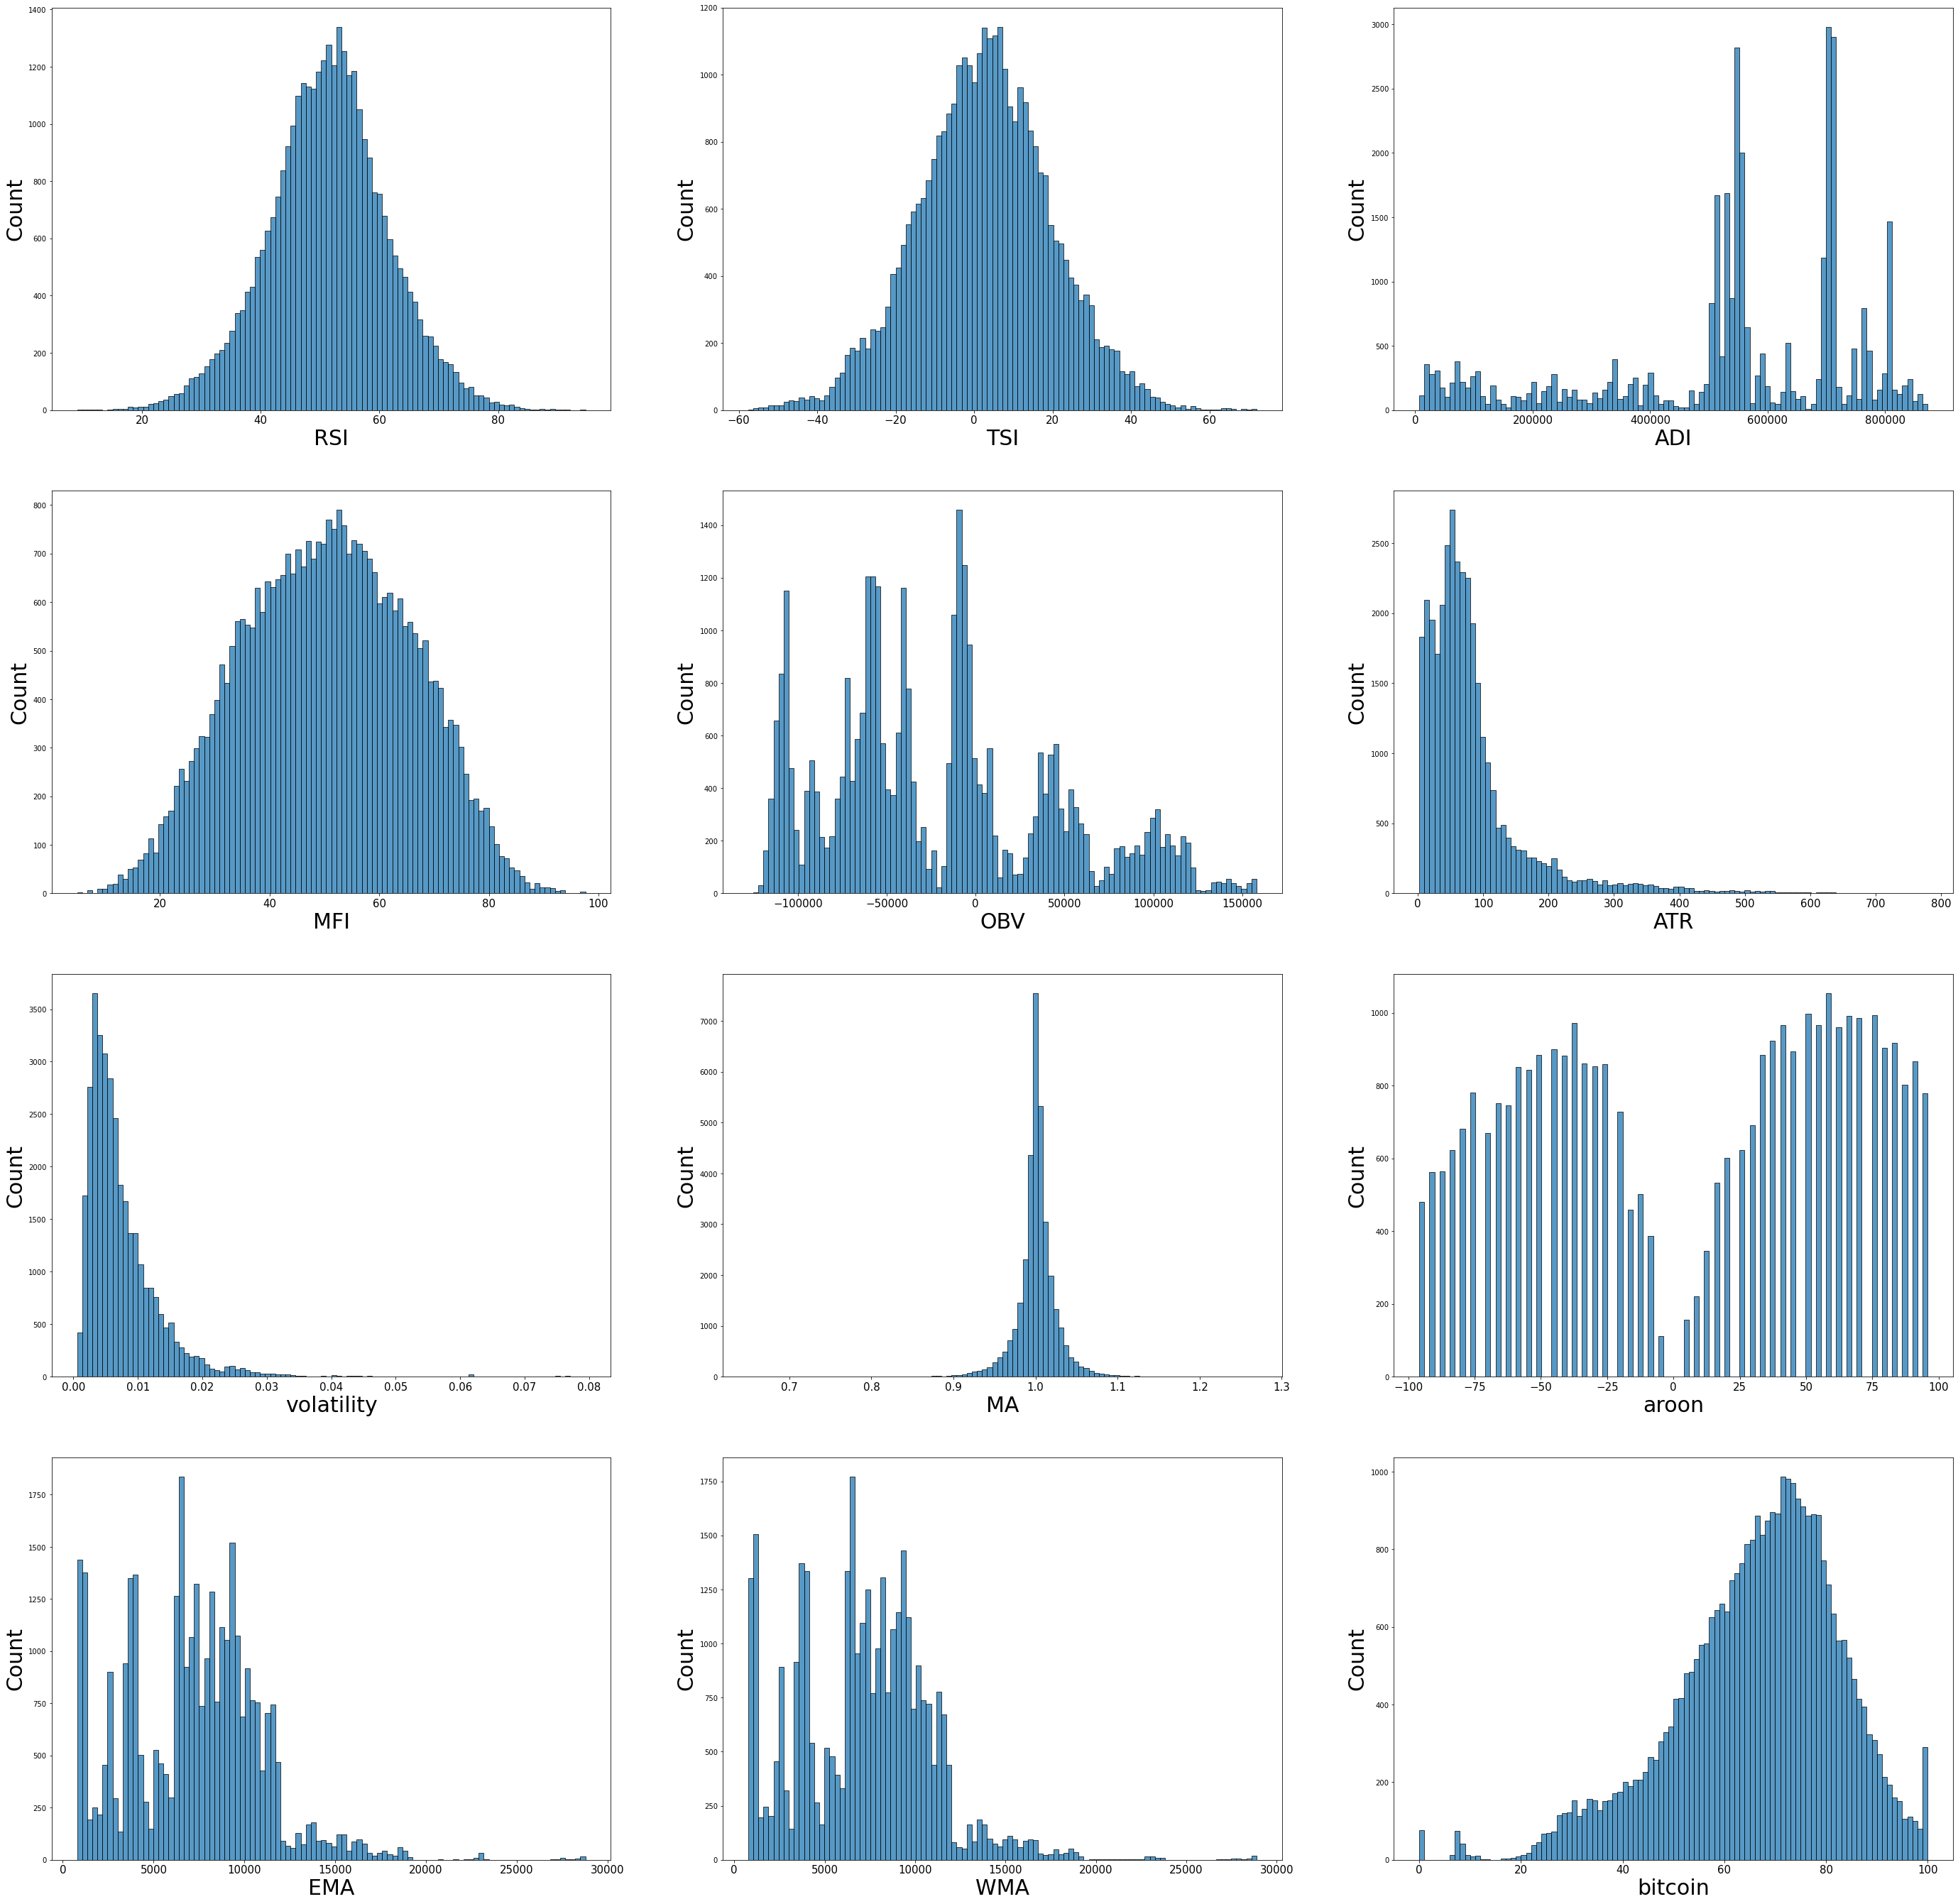

In [81]:
fig, axes = plt.subplots(len(xhour.columns)//3, 3, figsize=(48, 48))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['xtick.labelsize'] = 15
axes = axes.flatten()


for i,col in enumerate(xhour.columns[0:]):
     sns.histplot(x=xhour[col], bins=100, ax=axes[i])


<AxesSubplot:>

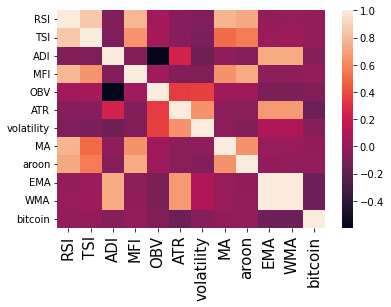

In [83]:
correlation = xhour.corr()
sns.heatmap(correlation)

In [5]:
xhour['next_hour'] = yhour

In [6]:
xhour

,RSI,TSI,ADI,MFI,OBV,ATR,volatility,MA,aroon,EMA,WMA,bitcoin,next_hour
date,,,,,,,,,,,,,
2017-01-04 01:00:00,62.395943,19.229803,6884.217137,58.056292,7686.515610,6.546617,0.004538,1.011210,66.666667,1020.812913,1021.959267,56,1
2017-01-04 02:00:00,63.462418,19.850272,7145.003741,54.893007,8045.949864,6.559258,0.004424,1.012912,66.666667,1021.905480,1023.045967,57,1
2017-01-04 03:00:00,65.001500,20.663031,7211.051482,68.082223,8665.147429,6.598456,0.003841,1.015069,79.166667,1023.165041,1024.355300,58,1
2017-01-04 04:00:00,66.782941,21.699715,7428.606887,68.394296,8929.286451,6.545604,0.003515,1.018117,83.333333,1024.634238,1025.898067,57,1
2017-01-04 05:00:00,67.280115,22.705477,7467.053227,69.203216,9245.538604,6.591620,0.003512,1.018411,87.500000,1026.074699,1027.469533,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,56.889671,17.893127,871935.930641,53.720196,-66397.195658,415.425271,0.008170,1.002666,-37.500000,28661.859411,28806.413467,37,1
2020-12-31 20:00:00,57.168328,17.588013,872028.381134,49.588360,-66032.131343,409.610051,0.007917,1.003442,-37.500000,28684.833058,28814.808500,38,1
2020-12-31 21:00:00,59.590797,17.727787,872542.942091,48.314504,-65511.359135,404.141299,0.008098,1.011510,16.666667,28725.913614,28842.697433,39,0


In [10]:
yminute = pd.read_csv('yTr_minute_classification.csv')
yminute = yminute.set_index('date')
x_minute = pd.read_csv('xTr_minute_classiification.csv')
x_minute = x_minute.set_index(x_minute['date'])

In [12]:
x_minute

,date,change_in_volume,PVO,ADI,MFI,OBV,RSI,TSI,crossed_SMA200_breakdown,crossed_SMA200_breakout,nextmin
date,,,,,,,,,,,
2017-07-20 00:00:00,2017-07-20 00:00:00,1.694373,0.181176,88201.924832,64.163608,100673.053895,53.148599,7.235874,0,0,0
2017-07-20 00:01:00,2017-07-20 00:01:00,-1.325690,-3.138730,88201.924832,63.406532,100673.422579,53.148599,7.974957,0,0,1
2017-07-20 00:02:00,2017-07-20 00:02:00,0.899670,-6.786668,88203.193185,64.848825,100674.690932,53.215311,8.634439,0,0,1
2017-07-20 00:03:00,2017-07-20 00:03:00,-0.668278,-10.824877,88203.193185,64.806681,100675.291008,56.514148,10.814191,0,0,1
2017-07-20 00:04:00,2017-07-20 00:04:00,4.031428,-13.418827,88207.824689,65.889557,100679.922511,59.523902,14.216984,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-13 08:14:00,2021-10-13 08:14:00,0.312500,22.139374,486458.730778,52.973447,321457.078265,48.518396,-1.533382,0,0,1
2021-10-13 08:15:00,2021-10-13 08:15:00,0.639219,17.696744,486459.782895,53.327325,321458.130383,49.128386,-0.634889,0,0,1
2021-10-13 08:16:00,2021-10-13 08:16:00,2.132965,13.601141,486462.967978,54.447195,321461.315466,50.292905,0.623182,0,0,1


In [11]:
x_minute['nextmin']=yminute

C:\Users\Chimera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='crossed_SMA200_breakout', ylabel='TSI'>

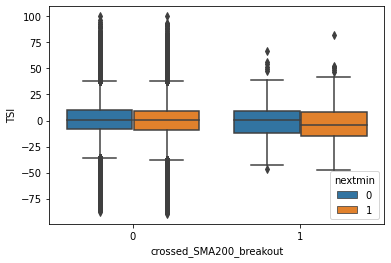

In [22]:
sns.boxplot(x_minute['crossed_SMA200_breakout'],x_minute['TSI'],x_minute['nextmin'])

C:\Users\Chimera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_hour', ylabel='bitcoin'>

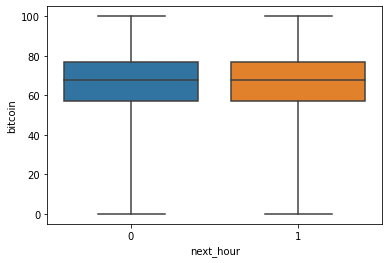

In [18]:
sns.boxplot(xhour['next_hour'],xhour['bitcoin'],whis=5)

C:\Users\Chimera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='next_hour', ylabel='aroon'>

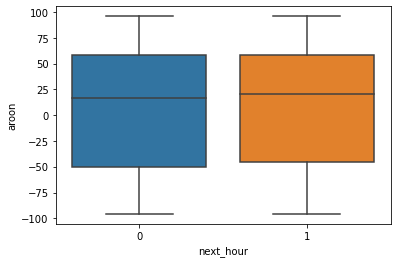

In [23]:
sns.boxplot(xhour['next_hour'],xhour['aroon'])